# Анализ данных покемонов

## Импорт библиотек и загрузка данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

file_path = 'Pokemon.csv'
df = pd.read_csv(file_path)


## 2.1: Сколько % покемонов имеет двойной тип?

In [5]:
def find_double_type_pokemon():
    double_type_count = df['Type 2'].notna().sum()
    total_pokemon = len(df)
    double_type_percentage = (double_type_count / total_pokemon) * 100
    return f'Процент покемонов с двойным типом: {double_type_percentage:.2f}%'

print(find_double_type_pokemon())

Процент покемонов с двойным типом: 51.75%


## 2.2: Сколько всего типов покемонов и какими они бывают?


In [8]:
def find_unique_pokemon_types():
    unique_types = pd.concat([df['Type 1'], df['Type 2'].dropna()]).unique()
    return (f'Количество уникальных типов покемонов: {len(unique_types)}'
            f'\nТипы покемонов: {unique_types}')

print(find_unique_pokemon_types())

Количество уникальных типов покемонов: 18
Типы покемонов: ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


## У кого лучше общие показатели (Total): у покемонов двойного или одинарного типа?


In [9]:
def compare_total_stats_by_type():
    single_type_pokemon = df[df['Type 2'].isna()]
    double_type_pokemon = df[df['Type 2'].notna()]
    single_type_avg_total = single_type_pokemon['Total'].mean()
    double_type_avg_total = double_type_pokemon['Total'].mean()
    return (f'Средний Total у покемонов одинарного типа: '
            f'{single_type_avg_total:.2f}\nСредний Total у покемонов двойного '
            f'типа: {double_type_avg_total:.2f}')

print(compare_total_stats_by_type())

Средний Total у покемонов одинарного типа: 412.02
Средний Total у покемонов двойного типа: 456.63


## 2.4: У кого лучше средний показатель Защита (Defense): у покемонов типа Grass или у покемонов типа Fairy?

In [10]:
def compare_defense_stats():
    grass_pokemon = df[(df['Type 1'] == 'Grass') | (df['Type 2'] == 'Grass')]
    fairy_pokemon = df[(df['Type 1'] == 'Fairy') | (df['Type 2'] == 'Fairy')]
    grass_avg_defense = grass_pokemon['Defense'].mean()
    fairy_avg_defense = fairy_pokemon['Defense'].mean()
    return (f'Средний показатель Defense у покемонов типа Grass: '
            f'{grass_avg_defense:.2f}\nСредний показатель Defense у покемонов '
            f'типа Fairy: {fairy_avg_defense:.2f}')

print(compare_defense_stats())

Средний показатель Defense у покемонов типа Grass: 73.25
Средний показатель Defense у покемонов типа Fairy: 70.40


## 2.5: Мы полагаем, что среднестатистический легендарный покемон должен быть сильнее, чем среднестатистический не легендарный. Подтвердите илиопровергните это предположение.

In [12]:
def compare_stats():
    legendary_pokemon = df[df['Legendary'] == True]
    non_legendary_pokemon = df[df['Legendary'] == False]
    legendary_mean_total = legendary_pokemon['Total'].mean()
    non_legendary_mean_total = non_legendary_pokemon['Total'].mean()
    return (f"Средний Total у легендарных покемонов: "
            f"{legendary_mean_total:.2f}\nСредний Total у нелегендарных "
            f"покемонов: {non_legendary_mean_total:.2f}")

print(compare_stats())


Средний Total у легендарных покемонов: 637.38
Средний Total у нелегендарных покемонов: 417.21


## 2.6: Покажите все случаи (пары покемонов), когда легендарный покемон по показателю Total оказался слабее, чем не легендарный. Сколько таких случаев?

In [13]:
def get_weaker_legends():
    legendary_pokemon = df[df['Legendary'] == True]
    non_legendary_pokemon = df[df['Legendary'] == False]
    all_pairs = pd.merge(
        legendary_pokemon,
        non_legendary_pokemon,
        how='cross',
        suffixes=('_legendary', '_non_legendary')
    )
    all_pairs.dropna(
        subset=['Total_legendary', 'Total_non_legendary'], inplace=True
    )
    weaker_legends = all_pairs[
        all_pairs['Total_legendary'] < all_pairs['Total_non_legendary']
        ]
    return weaker_legends


def show_pokemon_pairs():
    weaker_legends = get_weaker_legends()

    weaker_legends.dropna(
        subset=['Total_legendary', 'Total_non_legendary'], inplace=True
    )

    for index, row in weaker_legends.iterrows():
        print(
            f"{row['Name_legendary']} (Total: {row['Total_legendary']}) < "
            f"{row['Name_non_legendary']} (Total: {row['Total_non_legendary']}"
            ")"
        )

    print(f"Всего случаев: {len(weaker_legends)}")

show_pokemon_pairs()


Articuno (Total: 580) < VenusaurMega Venusaur (Total: 625)
Articuno (Total: 580) < CharizardMega Charizard X (Total: 634)
Articuno (Total: 580) < CharizardMega Charizard Y (Total: 634)
Articuno (Total: 580) < BlastoiseMega Blastoise (Total: 630)
Articuno (Total: 580) < AlakazamMega Alakazam (Total: 590)
Articuno (Total: 580) < SlowbroMega Slowbro (Total: 590)
Articuno (Total: 580) < GengarMega Gengar (Total: 600)
Articuno (Total: 580) < KangaskhanMega Kangaskhan (Total: 590)
Articuno (Total: 580) < PinsirMega Pinsir (Total: 600)
Articuno (Total: 580) < GyaradosMega Gyarados (Total: 640)
Articuno (Total: 580) < AerodactylMega Aerodactyl (Total: 615)
Articuno (Total: 580) < Dragonite (Total: 600)
Articuno (Total: 580) < Mew (Total: 600)
Articuno (Total: 580) < AmpharosMega Ampharos (Total: 610)
Articuno (Total: 580) < SteelixMega Steelix (Total: 610)
Articuno (Total: 580) < ScizorMega Scizor (Total: 600)
Articuno (Total: 580) < HeracrossMega Heracross (Total: 600)
Articuno (Total: 580) <

## Для каждой пары, в которой не легендарный покемон оказывается сильнее легендарного посчитайте разницу в показателе Total. Постройте гистограмму полученной величины. Похоже ли распределение на нормальное? Рассчитайте среднее арифметическое, медиану и моду данной величины.

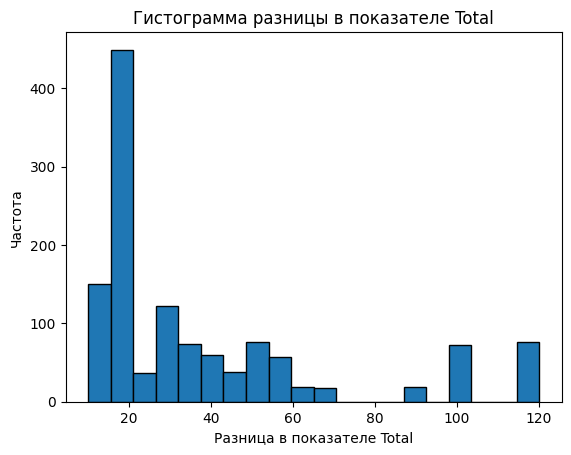

Среднее арифметическое разницы Total: 38.74624505928854 
Медиана разницы в показателе Total: 25.0 
Мода разницы в показателе Total: 20


In [14]:
def get_weaker_legends():
    legendary_pokemon = df[df['Legendary'] == True]
    non_legendary_pokemon = df[df['Legendary'] == False]
    all_pairs = pd.merge(
        legendary_pokemon,
        non_legendary_pokemon,
        how='cross',
        suffixes=('_legendary', '_non_legendary')
    )
    all_pairs.dropna(
        subset=['Total_legendary', 'Total_non_legendary'], inplace=True
    )
    weaker_legends = all_pairs[
        all_pairs['Total_legendary'] < all_pairs['Total_non_legendary']
        ]
    return weaker_legends

def analyze_total_difference():
    weaker_legends = get_weaker_legends()

    weaker_legends_df = pd.DataFrame(
        weaker_legends, columns=[
            'Legendary_Name',
            'Non_Legendary_Name',
            'Total_legendary',
            'Total_non_legendary'
        ]
    )

    weaker_legends_df.dropna(
        subset=['Total_legendary', 'Total_non_legendary'], inplace=True
    )

    weaker_legends_df['Total_Difference'] = (
            weaker_legends_df['Total_non_legendary'] -
            weaker_legends_df['Total_legendary']
    )
    plt.hist(weaker_legends_df['Total_Difference'], bins=20, edgecolor='k')
    plt.title('Гистограмма разницы в показателе Total')
    plt.xlabel('Разница в показателе Total')
    plt.ylabel('Частота')
    plt.show()

    mean_difference = weaker_legends_df['Total_Difference'].mean()
    median_difference = weaker_legends_df['Total_Difference'].median()
    mode_difference = stats.mode(weaker_legends_df['Total_Difference'])[0]

    print(f'Среднее арифметическое разницы Total: {mean_difference} '
          f'\nМедиана разницы в показателе Total: {median_difference} '
          f'\nМода разницы в показателе Total: {mode_difference}')

analyze_total_difference()

## 2.8.Назовите две характеристики покемонов, которые коррелируют в наименьшей степени.

In [15]:
def find_min_correlation_pair(stats):
    correlation_matrix = df[stats].corr()
    min_correlation = correlation_matrix.where(
        ~np.eye(correlation_matrix.shape[0], dtype=bool)
    ).min().min()

    min_correlation_pair = correlation_matrix.where(
        ~np.eye(correlation_matrix.shape[0], dtype=bool)
    ).stack().idxmin()

    return min_correlation, min_correlation_pair


battle_stats = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def',
                'Speed']
min_corr, min_corr_pair = find_min_correlation_pair(battle_stats)

print(f"Две характеристики с наименьшей корреляцией: {min_corr_pair}"
      f" (Корреляция: {min_corr})")

Две характеристики с наименьшей корреляцией: ('Defense', 'Speed') (Корреляция: 0.01522659808859742)


## 2.9. Что делает покемона легендарным, кроме суммы характеристик? Важнее сила атаки или сила защиты, а может сила специальной атаки или сила специальной защиты, или скорость, или здоровье? А может важна уникальность типа или поколение покемона? Подкрепите свое мнение расчетами.

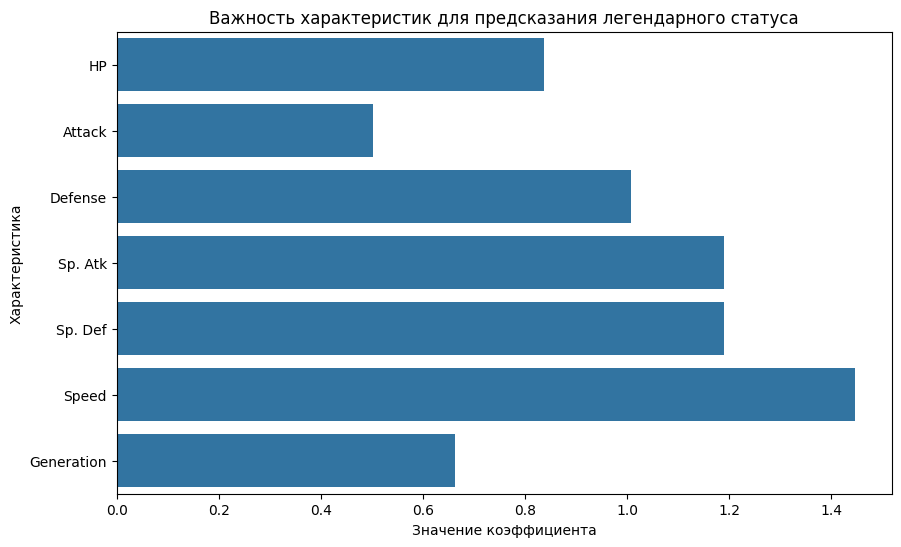

Accuracy: 0.94375
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       150
           1       0.54      0.70      0.61        10

    accuracy                           0.94       160
   macro avg       0.76      0.83      0.79       160
weighted avg       0.95      0.94      0.95       160



In [16]:
def analyze_legendary_status(features):
    X = df[features]
    y = df['Legendary'].astype(int)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                        test_size=0.2,
                                                        random_state=42)

    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)

    y_pred = log_reg.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    coefficients = log_reg.coef_[0]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=coefficients, y=features)
    plt.title('Важность характеристик для предсказания легендарного статуса')
    plt.xlabel('Значение коэффициента')
    plt.ylabel('Характеристика')
    plt.show()

    print(f'Accuracy: {accuracy}')
    print(f'Classification Report:\n{classification_rep}')

features = [
    'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
]
analyze_legendary_status(features)
